# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print "Modules Imported!"

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

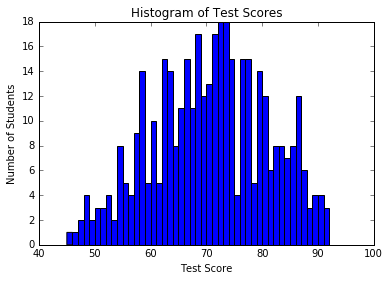

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

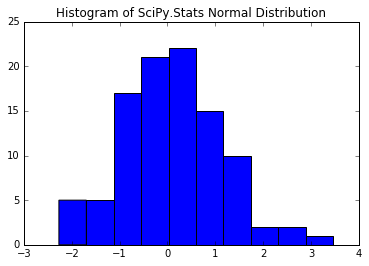

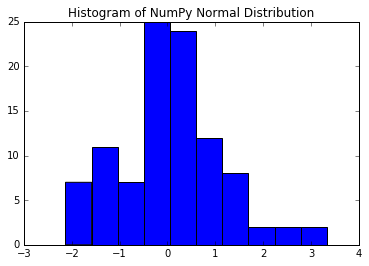

In [8]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
#np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
#np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

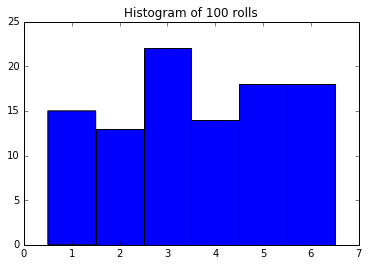

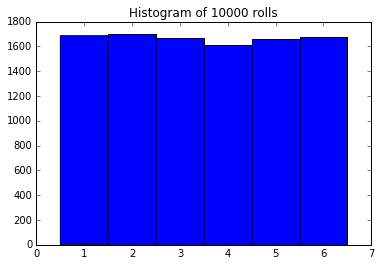

In [17]:
x = np.zeros(100)
p = (1./6, 1./6, 1./6, 1./6, 1./6, 1./6)
c= (1,2,3,4,5,6)
X= st.rv_discrete(values=(c,p))
x = X.rvs(size = 100)
plt.hist(x, bins= [1, 2, 3, 4, 5, 6, 7],align='left')
plt.title('Histogram of 100 rolls')
plt.figure()
y= X.rvs(size = 10000)
plt.hist(y, bins= [1, 2, 3, 4, 5, 6, 7],align='left')
plt.title('Histogram of 10000 rolls')

__Answer:__ 1) Yes, answer is as expected.
2) There is a difference. Projections in the 10000 attempt plot are tending to be almost equal. This is because the we increased the number of rolls significantly.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

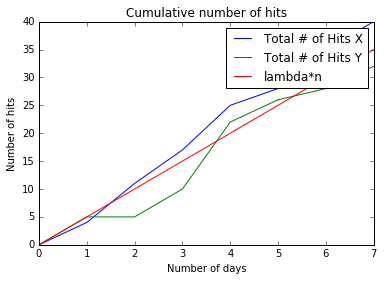

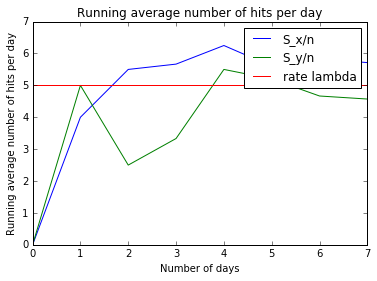

In [79]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

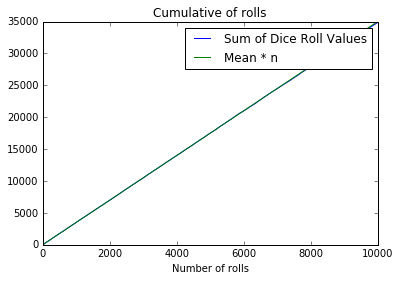

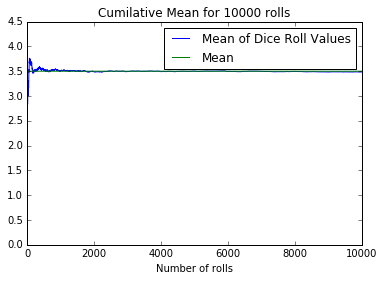

In [18]:
p = (1./6, 1./6, 1./6, 1./6, 1./6, 1./6)
c= (1,2,3,4,5,6)
obj= st.rv_discrete(values=(c,p))

N = 10000
x = [obj.rvs()]    
Sx = [0] 
Ax = [0.0] 

for n in range(1,N+1): 
    x.append(obj.rvs()) 
    Sx.append(Sx[n-1]+x[n]) 
    Ax.append(Sx[n]/(1.*n)) 

n = np.linspace(0,N,N+1) 

plt.plot(Sx, label = 'Sum of Dice Roll Values') 
plt.plot(n, 3.5*n, label = 'Mean * n') 
plt.title('Cumulative of rolls')
plt.xlabel('Number of rolls')
plt.legend()

plt.figure() 
plt.plot(Ax, label = 'Mean of Dice Roll Values') 
plt.plot(3.5*np.ones(N+1), label = 'Mean') 
plt.title('Cumilative Mean for 10000 rolls')
plt.xlabel('Number of rolls')
plt.legend()

__Answer:__ Approximation of the Sum: (Mean)(n) = 3.5n       
Approximation of the Average: Mean = 3.5

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

In [22]:
n = 1000000   #No. of hands to sim
TP = 0    #Initializing variables for hands
TK = 0
FH = 0
Flush = 0
diff = 0


for i in range(n):   #Drawing cards
    face = np.zeros((4,13))
    k = 0
    while k < 5:
        suit = np.random.randint(1,5)
        number = np.random.randint(1,14)
        if face[suit-1,number-1] == 0:   #Card an be drawn just once
            face[suit-1,number-1] = 1
            k+=1
        
    numC = np.sum(face,0)
    TPC = 0    #Setting all Hand Counts to 0
    TKC = 0
    FHC = 0
    FlushC = 0
    diffC = 0
    for j in range(13):   #Summing possibilities of hands
        if numC[j] == 1:
            TPC+=1
            TKC+=1
            FHC-=200
        elif numC[j] == 2:
            TPC+=5
            TKC-=200
            FHC+=5
        elif numC[j] == 3:
            TPC-=200
            TKC+=15
            FHC+=15
        elif numC[j] == 4:
            TPC-=200
            TKC-=200
            FH-=200
    
    suitC = np.sum(face,1)
    for j in range(4):
        if suitC[j] == 5:
            FlushC = 25
    
    if TPC == 11:
        TP+=1
    elif TKC == 17:
        TK+=1
    elif FHC == 20:
        FH+=1
    elif FlushC == 25:
        Flush+=1
    else:
        diff+=1

SS = float(TP+TK+FH+Flush+diff)
PTP = float(TP)/SS
PTK = float(TK)/SS
PFH = float(FH)/SS
PFlush = float(Flush)/SS

print "Empirical probability of two pairs =",PTP
print "Empirical probability of three of a kind =",PTK
print "Empirical probability of fullhouse =",PFH
print "Empirical probability of flush =",PFlush


Empirical probability of two pairs = 0.0499852848434
Empirical probability of three of a kind = 0.0222661341181
Empirical probability of fullhouse = -0.0495879756149
Empirical probability of flush = 0.00212318688249


__Answer:__ Calculation for the Problem:
P(Two Pairs) = (13choose2*11choose1*4choose2*4choose2*4)/(52choose5) = 0.047539        
P(Threes of a kind) = (13choose1*4choose3*12choose2*(4choose2)^2/(52choose5) = 0.021128      
P(Fullhouse) = (13choose1*4choose3*12choose1*4choose2)/(52choose5) = 0.001441       
P(Flush) = (4choose1*13choose5)/(52choose5) = 0.0019654

3) Theoretic and empirical probabilies add up well.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

__Answer of Part 1:__ I would switch doors are we would be picking the prize out of 2 doors rather than 3.

In [31]:
n = 1000000      #No of simulations
SwitchC = 0      #Initialize
SameC = 0
SwitchDoorN = 0

for i in range(n):
    door = np.zeros(3)#initialize the doors with default of o
    Prize = np.random.randint(0,3)#randomly choose 1 prize among the three doors
    door[Prize] = 1#assign the door that has the prize the value of 1

    #Picking a door
    init = np.random.randint(0,3)                 #Pick initial door
    if init == Prize:                             #If initial door has prize
        if door[0] == 1:
            Picked = np.random.choice((1,2))      #Pick between 1 and 2
        elif door[1] == 1:
            Picked = np.random.choice((0,2))      #Pick between 0 and 2
        else:
            Picked = np.random.choice((0,1))      #Pick between 0 and 1
        door[Picked] = 10
        SwitchDoorN = 3 - Prize - Picked
        
    elif init != Prize:   #If initial door doesn't have the prize
        door[3 - init - Prize] = 10
        SwitchDoorN = Prize
        
    if SwitchDoorN == Prize:
        SwitchC+=1
    else:
        SameC+=1
        
SS = (float)(SameC + SwitchC)  
#Let SS as the total number of times of win when keeping the same door and switching to another door

print "The probability of winning when switching = ",(float)(SwitchC)/SS
print "The probability of winning when remaining the same = ",(float)(SameC)/SS

The probability of winning when switching =  0.666689
The probability of winning when remaining the same =  0.333311


__Answer of Part 4:__  I would definately switch every time I play the game!

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 